In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#os — to read files and directory structure
#numpy — for some matrix math outside of TensorFlow
#matplotlib.pyplot — to plot the graph and display images in our training and validation data

import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [7]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print


FIND : format incorrect de paramètre


In [8]:
#Nous allons maintenant attribuer des variables avec le chemin de fichier approprié pour les ensembles de formation et de validation.

base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [9]:
#Let's look at how many cats and dogs images we have in our training and validation directory

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [10]:
#Définition des paramètres du modèle
#nous configurerons des variables qui seront utilisées plus tard lors du prétraitement de notre ensemble de données et de la formation de notre réseau.

BATCH_SIZE = 100  # Nombre d'exemples de formation à traiter avant de mettre à jour les variables de nos modèles
IMG_SHAPE  = 150  # Nos données de formation sont constituées d'images d'une largeur de 150 pixels et d'une hauteur de 150 pixels

In [12]:
#Data Augmentation

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [13]:
#Retourner l'image horizontalement
#Nous pouvons commencer par appliquer de manière aléatoire une augmentation de retournement horizontal à notre ensemble de données 
#et voir à quoi ressembleront les images individuelles après la transformation. 
#Ceci est réalisé en passant horizontal_flip=True comme argument à la classe ImageDataGenerator.

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


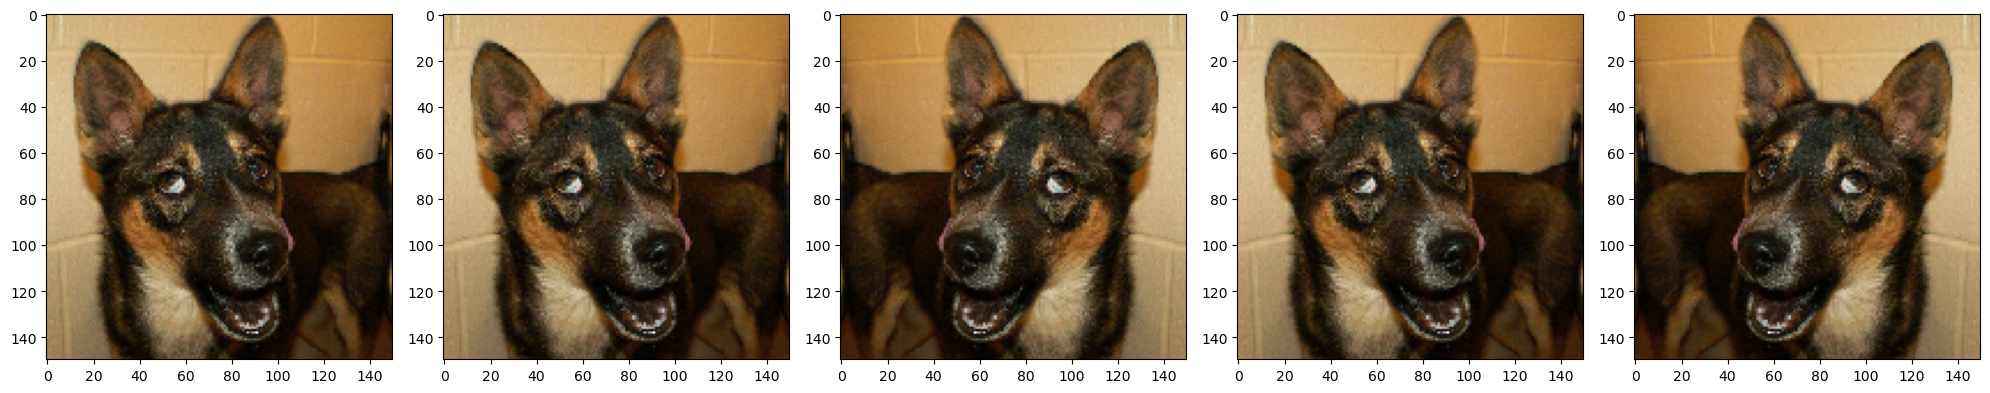

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [15]:
#Rotation de l'image
#L'augmentation de la rotation fera pivoter l'image de manière aléatoire jusqu'à un nombre de degrés spécifié. Ici, nous le fixerons à 45.

image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


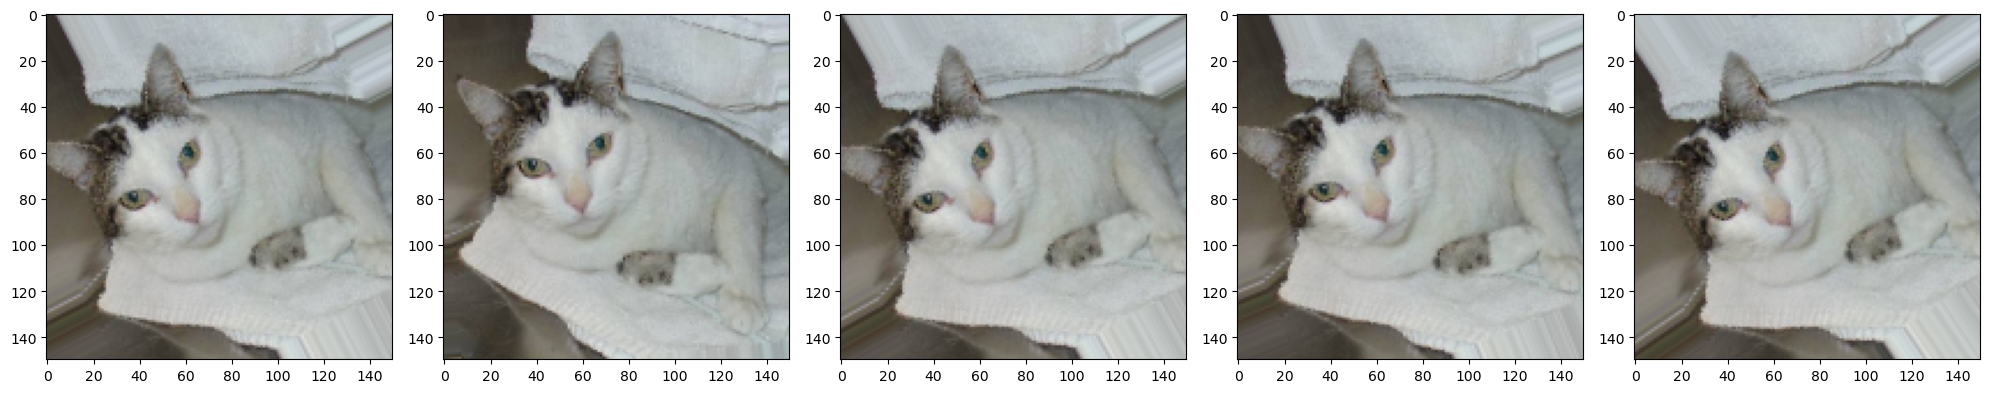

In [16]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [17]:
#Application du zoom
#Nous pouvons également appliquer une augmentation du zoom à notre ensemble de données, en zoomant sur les images jusqu'à 50 % de manière aléatoire.

image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 2000 images belonging to 2 classes.


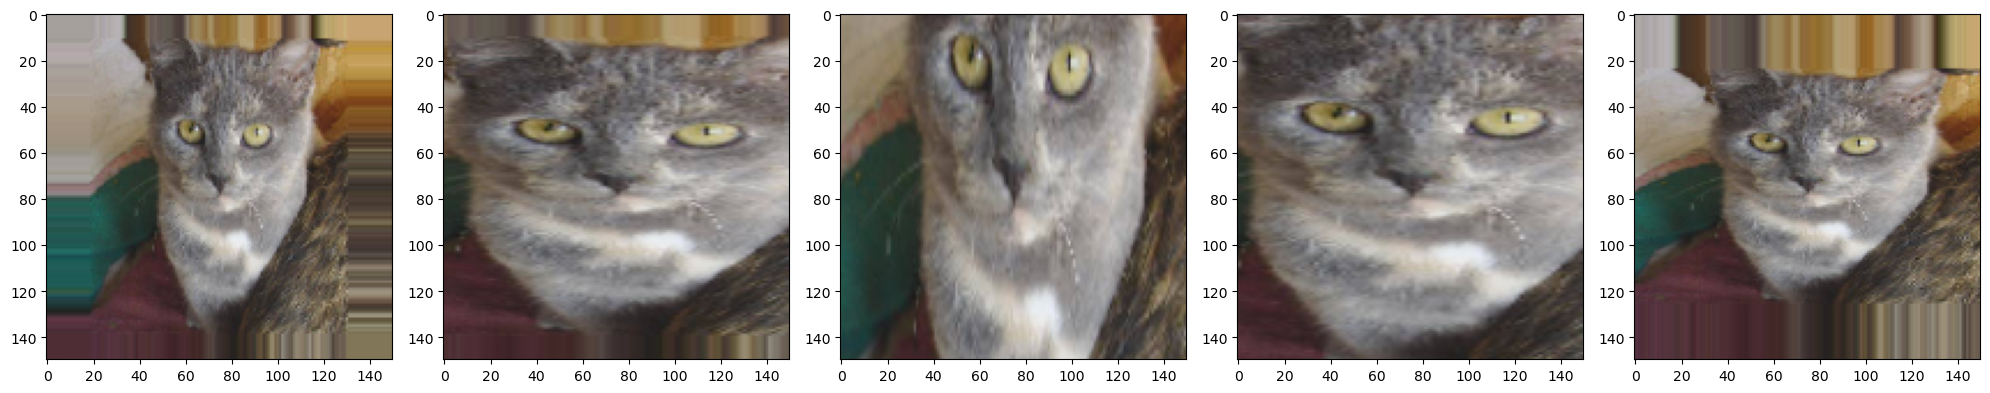

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [19]:
#Mettre tous ensemble
#Ici la redimensionnement, la rotation de 45 degrés, le décalage de largeur, le décalage de hauteur, le retournement horizontal et 
#l'augmentation du zoom à nos images d'entraînement.

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


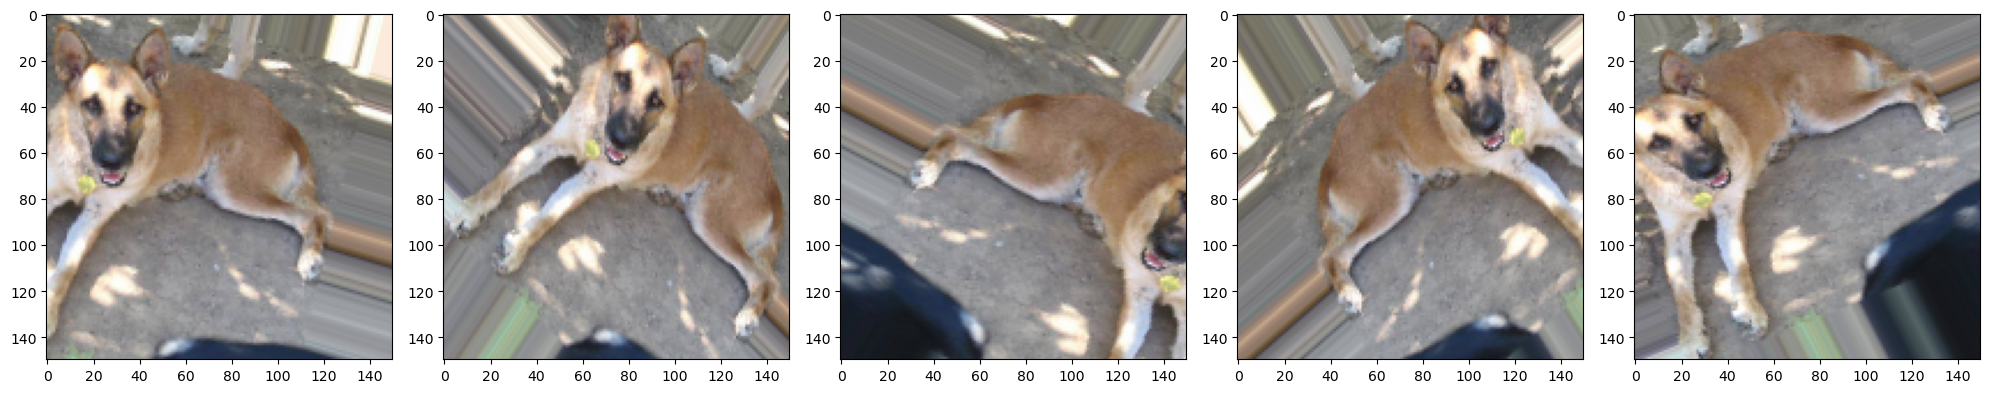

In [20]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [21]:
#Création d'un générateur de données de validation
#Généralement, nous appliquons uniquement l'augmentation des données à nos exemples de formation, car les images originales
#doivent être représentatives de ce que notre modèle doit gérer. 
#Ainsi, dans ce cas, nous redimensionnons uniquement nos images de validation et les convertissons en lots à l'aide d'ImageDataGenerator.

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [22]:
#Définir le modèle
#Le modèle se compose de quatre blocs de convolution avec une couche de pool maximale dans chacun d'eux.
#Avant les dernières couches denses, nous appliquons également une probabilité d'abandon de 0,5. 
#Cela signifie que 50 % des valeurs entrant dans la couche Dropout seront mises à zéro. Cela aide à éviter le surapprentissage.
#Nous avons ensuite une couche entièrement connectée de 512 unités, avec une fonction d'activation relu. 
#Le modèle générera des probabilités de classe pour deux classes – chiens et chats – en utilisant softmax.

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [23]:
#COMPILER LE MODELE
#Comme d'habitude, nous utiliserons l'optimiseur Adam.
#Puisque nous produisons une catégorisation softmax, nous utiliserons sparse_categorical_crossentropy comme fonction de perte.
#Nous aimerions également examiner la précision de la formation et de la validation à chaque époque au fur et à mesure que 
#nous formons notre réseau, nous transmettons donc l'argument des métriques.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
#R2SUM2 DU MODELE
#Examinons toutes les couches de notre réseau en utilisant la méthode récapitulative.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [25]:
#ENTRAINER LE MODELE
#Il est temps de former notre réseau.
#Puisque nos lots proviennent d'un générateur (ImageDataGenerator), nous utiliserons fit_generator au lieu de fit.

EPOCHS = 100 #plus ce nombre augmente et plus la precision augmente
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

C:\Users\quent\AppData\Local\Temp\ipykernel_24944\1831712691.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
20/20 [==============================] - 29s 1s/step - loss: 0.6996 - accuracy: 0.5190 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 27s 1s/step - loss: 0.6864 - accuracy: 0.5200 - val_loss: 0.6810 - val_accuracy: 0.5040
Epoch 3/100
20/20 [==============================] - 27s 1s/step - loss: 0.6857 - accuracy: 0.5260 - val_loss: 0.6589 - val_accuracy: 0.5810
Epoch 4/100
20/20 [==============================] - 27s 1s/step - loss: 0.6654 - accuracy: 0.5730 - val_loss: 0.6535 - val_accuracy: 0.5880
Epoch 5/100
20/20 [==============================] - 27s 1s/step - loss: 0.6502 - accuracy: 0.5885 - val_loss: 0.6573 - val_accuracy: 0.5560
Epoch 6/100
20/20 [==============================] - 26s 1s/step - loss: 0.6353 - accuracy: 0.6105 - val_loss: 0.6334 - val_accuracy: 0.6480
Epoch 7/100
20/20 [==============================] - 27s 1s/step - loss: 0.6387 - accuracy: 0.6330 - val_loss: 0.6117 - val_accuracy: 0.6510
Epoch 8/100
2

In [ ]:

#VISUALISER LES RESULAT DE L'ENTRAINEMENT

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

